In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from itertools import combinations_with_replacement, combinations
from utils.models import IsoelasticWealthChange, Gamble, GamblePair

mpl.rcParams["font.size"] = 15

In [2]:
# Experimental setup
fractals = [IsoelasticWealthChange(gamma=g, eta=0) for g in np.linspace(-1, 1, 9)]
gambles = [Gamble(f1, f2) for f1, f2 in combinations_with_replacement(fractals, 2)]
gamble_pairs = [GamblePair(g1, g2) for g1, g2 in combinations(gambles, 2)]

In [3]:
gamma_dist_thr_perc_range = np.linspace(0, 1, 17)

df = pd.DataFrame(index=gamma_dist_thr_perc_range)

for gamma_dist_thr_perc in gamma_dist_thr_perc_range:
    gamma_dist_thr = gamma_dist_thr_perc * 2
    gamble_pairs_filtered = [gp for gp in gamble_pairs if gp.gamma_distance <= gamma_dist_thr]
    
    # Store values
    df.loc[gamma_dist_thr_perc, "n"] = len(gamble_pairs_filtered)
    df.loc[gamma_dist_thr_perc, "n_nobrainers"] = sum(
        [gp.is_nobrainer for gp in gamble_pairs_filtered])
    df.loc[gamma_dist_thr_perc, "n_mixed"] = sum(
        [gp.is_mixed for gp in gamble_pairs_filtered])
    df.loc[gamma_dist_thr_perc, "n_mixed_nobrainers"] = sum(
        [gp.is_mixed and gp.is_nobrainer for gp in gamble_pairs_filtered])
    df.loc[gamma_dist_thr_perc, "n_win"] = sum(
        [gp.is_win for gp in gamble_pairs_filtered])    
    df.loc[gamma_dist_thr_perc, "n_loss"] = sum(
        [gp.is_loss for gp in gamble_pairs_filtered])

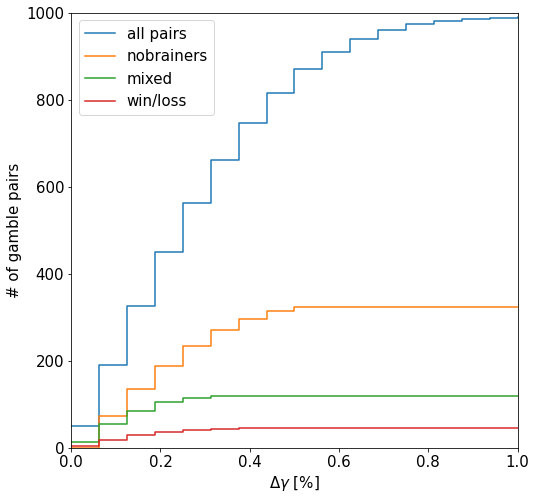

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(df.index, df["n"], where="post", label="all pairs")
ax.step(df.index, df["n_nobrainers"], where="post", label="nobrainers")
ax.step(df.index, df["n_mixed"], where="post", label="mixed")
ax.step(df.index, df["n_win"], where="post", label="win/loss")

ax.set_ylim([0, 1000])
ax.set_xlim([0, 1])

ax.set_xlabel(r"$\Delta\gamma$ [%]")
ax.set_ylabel(r"# of gamble pairs")

ax.legend()

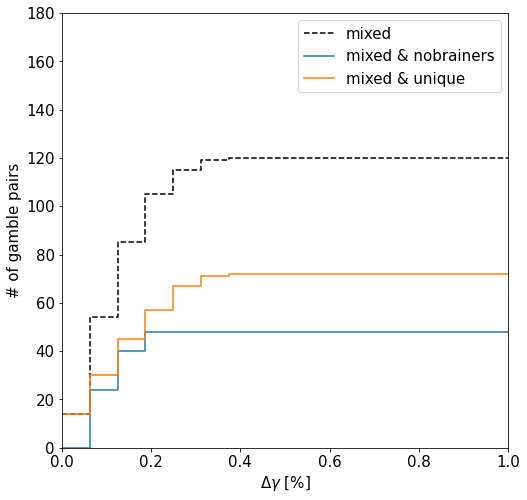

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(
    df.index, 
    df["n_mixed"], 
    where="post", 
    label="mixed", 
    color="k",
    ls="--"
)
ax.step(
    df.index, 
    df["n_mixed_nobrainers"], 
    where="post", 
    label="mixed & nobrainers"
)
ax.step(
    df.index, 
    df["n_mixed"] - df["n_mixed_nobrainers"], 
    where="post", 
    label="mixed & unique"
)

ax.set_ylim([0, 180])
ax.set_xlim([0, 1])
ax.set_xlabel(r"$\Delta\gamma$ [%]")
ax.set_ylabel(r"# of gamble pairs")
ax.legend()